In [1]:
import numpy as np
import tensorflow as tf
import pathlib

from PIL import Image

2022-10-02 10:55:09.336203: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-02 10:55:09.435390: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-02 10:55:09.435403: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-02 10:55:09.456667: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-02 10:55:09.886575: W tensorflow/stream_executor/platform/de

In [2]:
print(tf.__version__)

2.10.0


In [3]:
classes = ['building', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [4]:
dataset_dir = pathlib.Path('../dataset')
dataset_test_dir = list(dataset_dir.glob('test/*'))

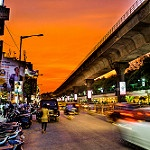

In [5]:
img1 = Image.open(str(dataset_test_dir[0]))
img1

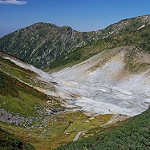

In [6]:
img2 = Image.open(str(dataset_test_dir[1]))
img2

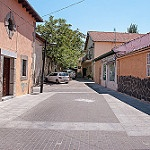

In [7]:
img3 = Image.open(str(dataset_test_dir[2]))
img3

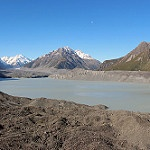

In [8]:
img4 = Image.open(str(dataset_test_dir[3]))
img4

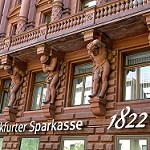

In [9]:
img5 = Image.open(str(dataset_test_dir[4]))
img5

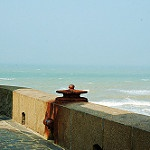

In [10]:
img6 = Image.open(str(dataset_test_dir[5]))
img6

In [11]:
interpreter = tf.lite.Interpreter(model_path='../static/model/model.tflite')
interpreter.allocate_tensors()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [12]:
input_details = interpreter.get_input_details()
input_details

[{'name': 'serving_default_input_2:0',
  'index': 0,
  'shape': array([  1, 150, 150,   3], dtype=int32),
  'shape_signature': array([ -1, 150, 150,   3], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [13]:
output_details = interpreter.get_output_details()
output_details

[{'name': 'StatefulPartitionedCall:0',
  'index': 628,
  'shape': array([1, 6], dtype=int32),
  'shape_signature': array([-1,  6], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [14]:
def predict(image):
    # [1 150 150 3]
    input_shape = input_details[0]['shape']
    input_data = tf.keras.utils.img_to_array(image).reshape(input_shape)
    interpreter.set_tensor(input_details[0]['index'], input_data)
    interpreter.invoke()
    output_data = interpreter.get_tensor(output_details[0]['index']).reshape(6,)
    return classes[np.argmax(output_data)]

In [15]:
for i in range(6):
    print(predict(Image.open(str(dataset_test_dir[i]))))

street
mountain
street
glacier
building
sea
